# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('diamonds.csv')

In [3]:
df.shape

(53940, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
carat      53940 non-null float64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
price      53940 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.isna().sum() 

cut        0
color      0
clarity    0
depth      0
table      0
carat      0
x          0
y          0
z          0
price      0
dtype: int64

# Data Visualization

In [6]:
import seaborn as sns

## cut

In [7]:

df['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

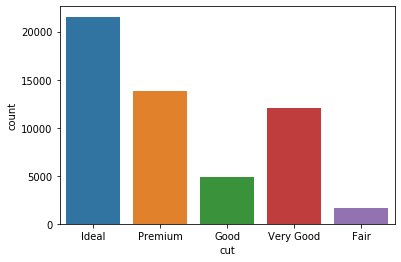

In [8]:
sns.countplot(df['cut'])

## color

In [9]:

df['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

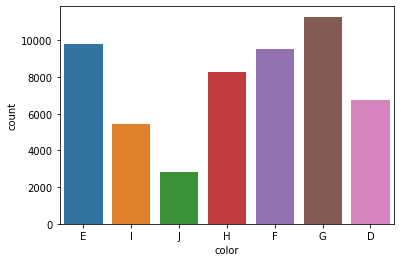

In [10]:
sns.countplot(df['color'])

## Clarity

In [11]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

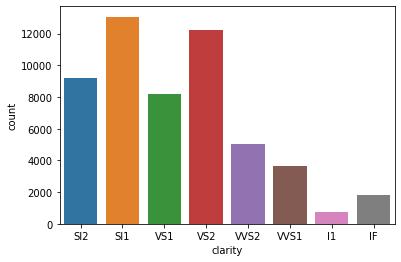

In [12]:
sns.countplot(df['clarity'])

## Depth

In [13]:
df['depth'].describe()

count    53940.000000
mean        61.749405
std          1.432621
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

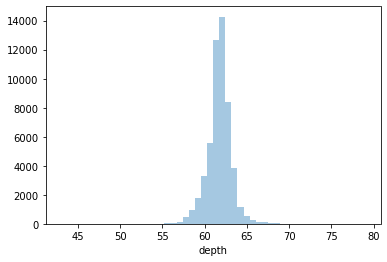

In [14]:
sns.distplot(df['depth'], kde=False)

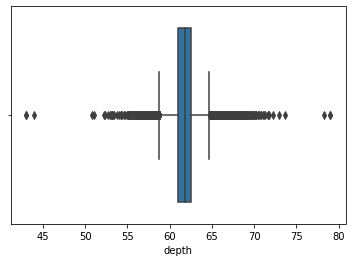

In [15]:
sns.boxplot(df['depth'])

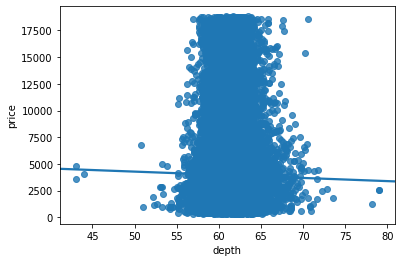

In [16]:
sns.regplot(x ="depth", y = 'price', data = df,ci=False)

## Table

In [17]:
df['table'].describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

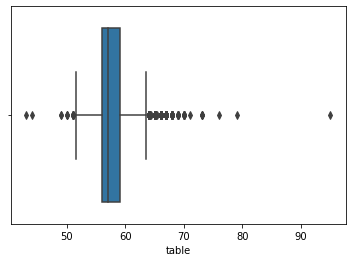

In [18]:
sns.boxplot(df['table'])

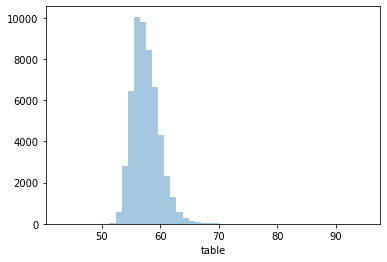

In [19]:
sns.distplot(df['table'], kde=False)

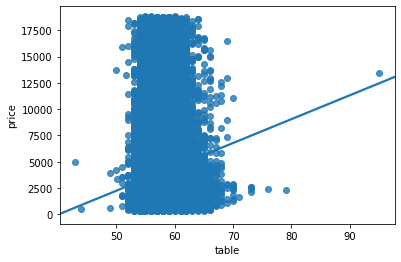

In [20]:
sns.regplot(x ="table", y = 'price', data = df,ci=False)

## Carat

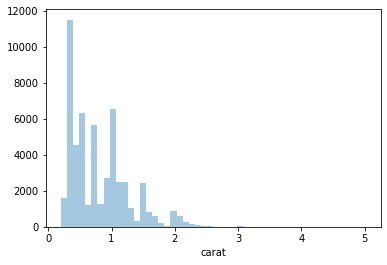

In [21]:
sns.distplot(df['carat'], kde=False)

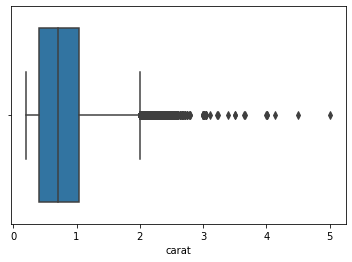

In [22]:
sns.boxplot(df['carat'])

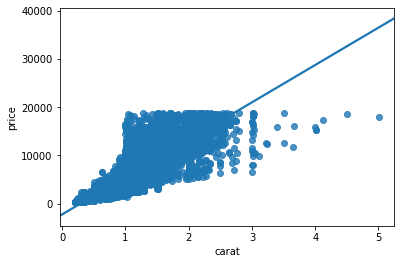

In [23]:
sns.regplot(x ="carat", y = 'price', data = df,ci=False)

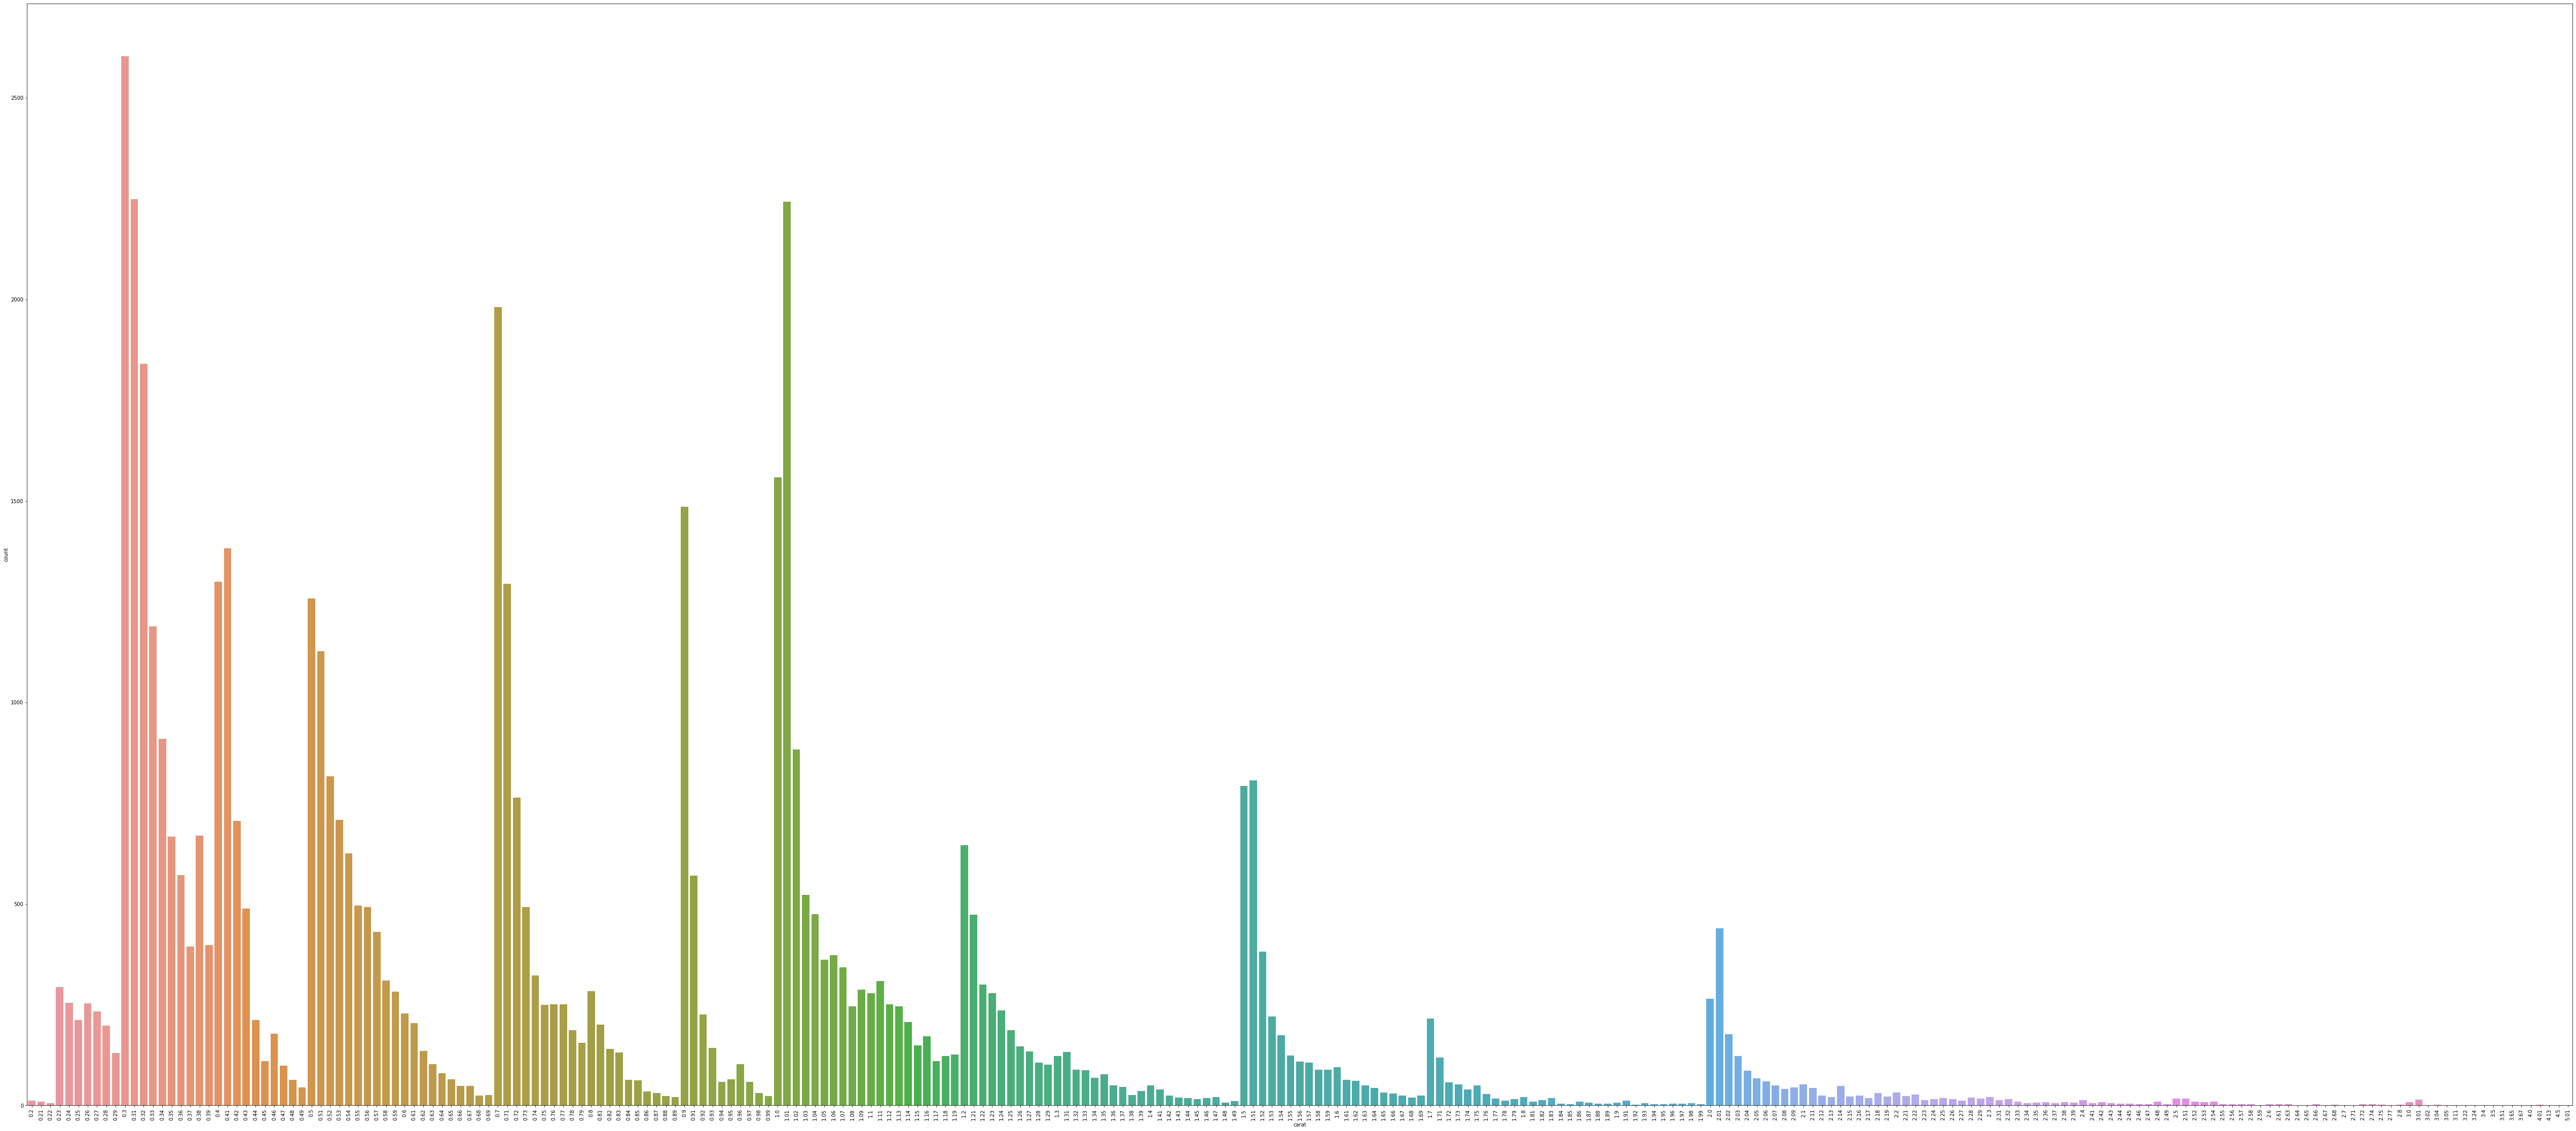

In [24]:
plt.gcf().set_size_inches(90,40)
plt.xticks(rotation='vertical')
sns.countplot(df['carat'])

## Length

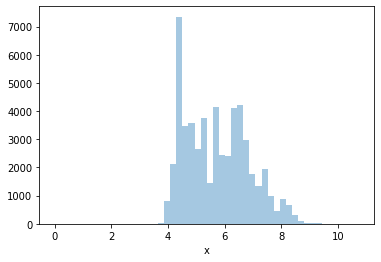

In [25]:
sns.distplot(df['x'], kde=False)

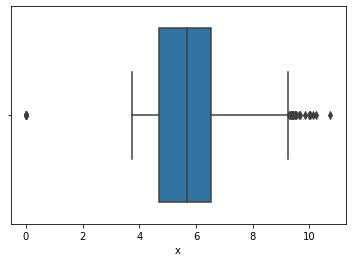

In [26]:
sns.boxplot(df['x'])

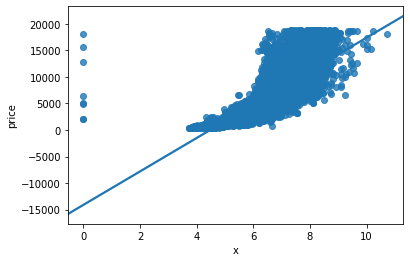

In [27]:
sns.regplot(x ="x", y = 'price', data = df,ci=False)

## Width

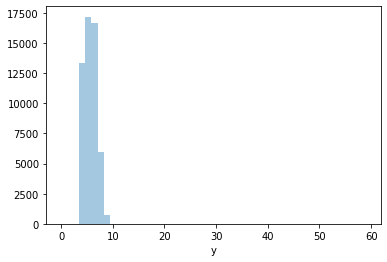

In [28]:
sns.distplot(df['y'], kde=False)

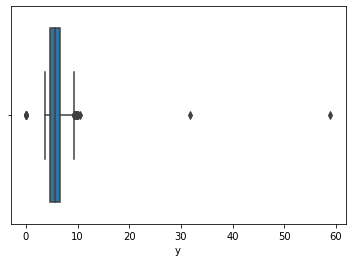

In [29]:
sns.boxplot(df['y'])

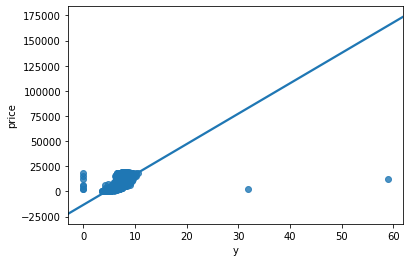

In [30]:
sns.regplot(x ="y", y = 'price', data = df,ci=False)

## Height

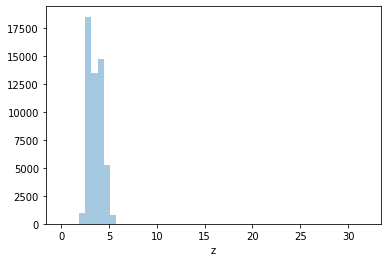

In [31]:
sns.distplot(df['z'], kde=False)

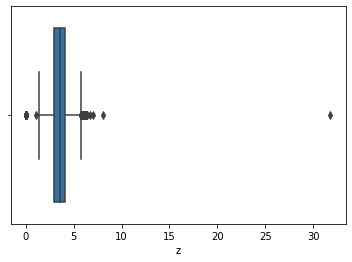

In [32]:
sns.boxplot(df['z'])

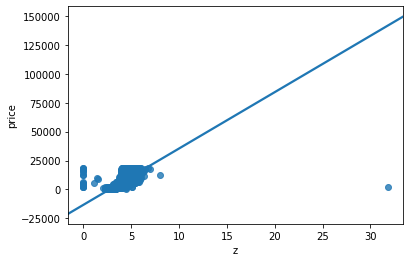

In [33]:
sns.regplot(x ="z", y = 'price', data = df,ci=False)

## Price

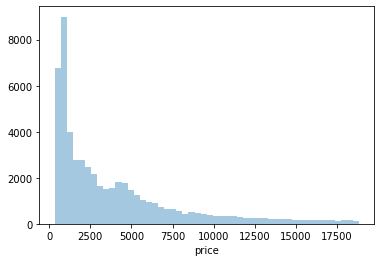

In [34]:
sns.distplot(df['price'], kde=False)

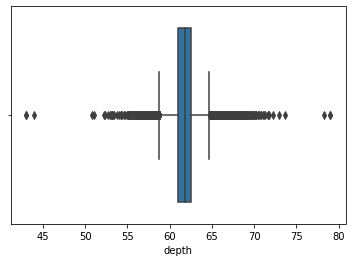

In [35]:
sns.boxplot(df['depth'])

# Bi-Variate analysis

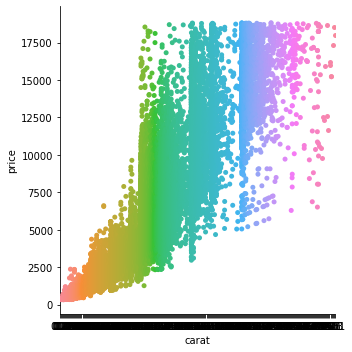

In [36]:
sns.catplot(x='carat',y="price", data=df)

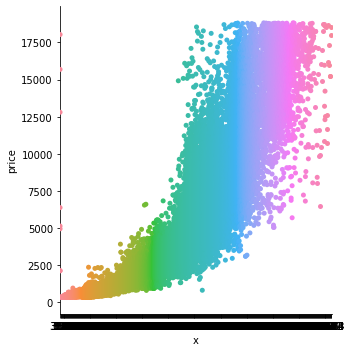

In [37]:
sns.catplot(x='x',y="price", data=df)

In [38]:
df.shape

(53940, 10)

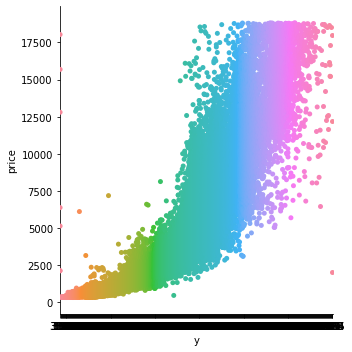

In [70]:
sns.catplot(x='y',y="price", data=df)

# One-Hot-Encoding

In [39]:
df= pd.get_dummies(df)

In [40]:
df.shape

(53940, 27)

In [46]:
y = df['price']
X = df.drop(columns=['price'])

In [47]:
X.shape,y.shape

((53940, 26), (53940,))

In [48]:
from sklearn.model_selection import train_test_split

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [51]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
model.intercept_

5978.172766097809

In [53]:
y_pred = model.predict(X_test)

In [54]:

model.score(X_test,y_test)

0.9212394719973422

In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 1248486.71
Mean Absolute Error : 737.44
R2 Score: 0.92


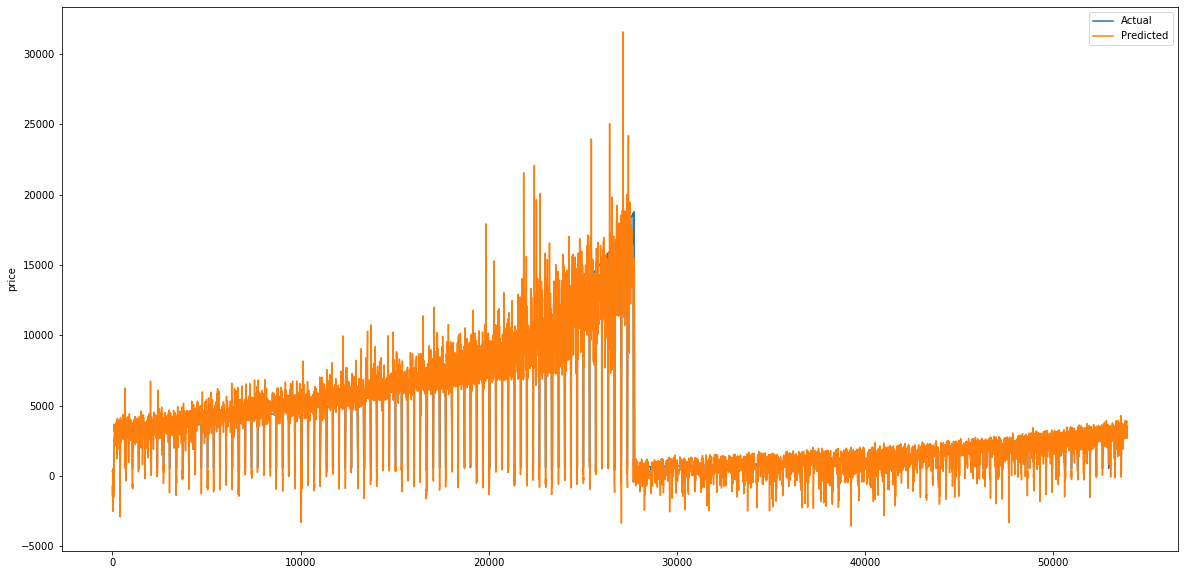

In [56]:
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('TRAIN SCORE ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 SCORE: {r2score:0.2f}")

G:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TRAIN SCORE  0.9962986766042806
R2 SCORE: 0.98


In [59]:
X_train.shape

(43152, 26)

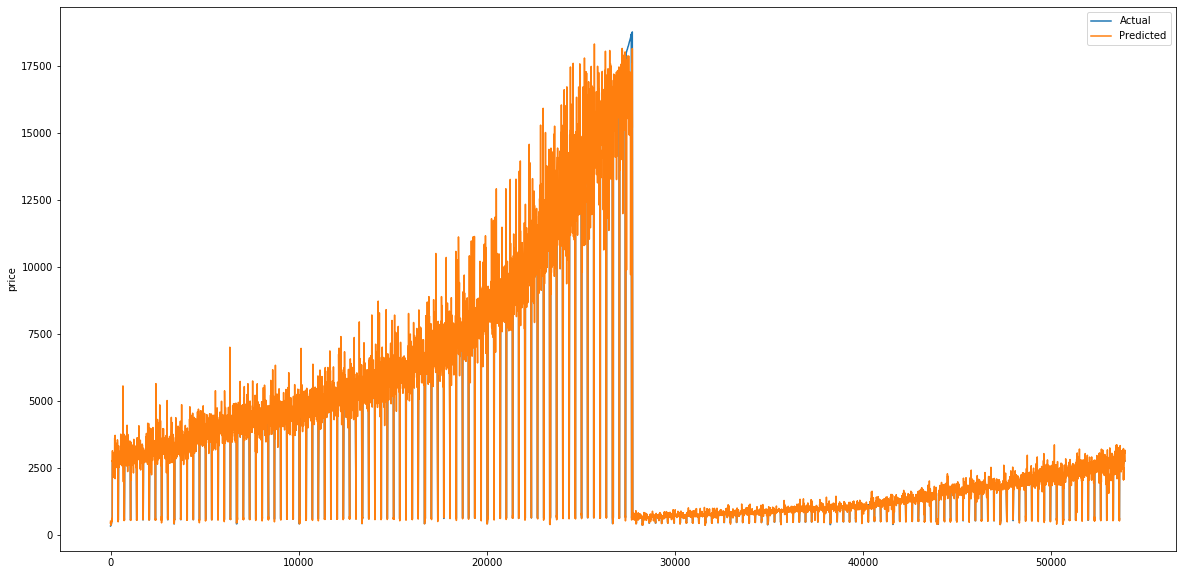

In [60]:
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

# Sthocastic Gradient Descent

In [61]:
from sklearn.linear_model import SGDRegressor
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:
model.score(X_test,y_test)

0.9791491677364759

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [65]:
# train scores
model.score(X_train,y_train)

0.12064330737856878

In [66]:
model.score(X_test,y_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.98
